In [26]:
library(dplyr)
library(ggplot2)

In [27]:
##################################################
#### cellular phenoypes

In [28]:
## cell type proportion

In [29]:
## D52

In [30]:
file_prefix = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
file_suffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_fractions_pivoted.tsv"

In [31]:
celltypes = read.table(paste0(file_prefix, file_suffix), header = T)
head(celltypes,2)

donor_id,pool_id,time_point,treatment,Astro,CHem,DA,Epen1,Epen2,FPP,P_FPP,P_Sert,Sert,unknown
HPSI0114i-bezi_3,pool10,D52,NONE,0.009174312,0.022935780,0.3027523,0.1788991,0,0.1422018,0.01834862,0.01376147,0.3119266,0
HPSI0114i-bezi_3,pool10,D52,ROT,0.022857143,0.005714286,0.2114286,0.2285714,0,0.1885714,0.00000000,0.01142857,0.3314286,0


In [32]:
donors = unique(celltypes$donor_id)

In [33]:
df = celltypes %>% group_by(donor_id) %>% summarise(mean_neuro = mean(DA+Sert))

In [34]:
head(df)

donor_id,mean_neuro
HPSI0114i-bezi_3,0.57876802
HPSI0114i-eipl_1,0.01278164
HPSI0114i-fikt_3,0.40896921
HPSI0114i-kolf_2,0.47284436
HPSI0114i-lexy_2,0.72873194
HPSI0114i-posc_1,0.80947368


In [39]:
################
## new PRS (PD)
PD_dir = "/hps/nobackup/hipsci/scratch/GWAS_Summary_Stats/SpecificStudies/ChangD_28892059_GCST004902/PD_Risk/"

In [48]:
myfile = paste0(PD_dir, "rawScoreMatrix.txt")
df1 = read.csv(myfile,sep='\t')
df1

X.,HPSI0216i.tony_5,HPSI0316i.pecz_2,HPSI0216pf.tony,HPSI0316pf.zuik,HPSI0316i.xaqm_4,HPSI0316i.tezs_6,HPSI0316pf.tezs,HPSI0216pf.puxp,HPSI0316i.zuik_6,...,HPSI0416i.eapo_2,HPSI0616i.duve_6,HPSI0616pf.bury,HPSI0516i.peoo_1,HPSI0416pf.eapo,HPSI0616i.mifg_5,HPSI0516pf.eosr,HPSI0616pf.xuvy,HPSI0416pf.cihd,HPSI0616i.mifg_2
PD_meta_analysis_PDGENE_PDWBS.harmonized.txt_P0.001,-5.319756,-5.938082,-5.415521,-6.328778,-6.209180,-5.918820,-5.735291,-6.571148,-6.444715,...,-4.895277,-5.842220,-4.795883,-4.524109,-4.717168,-5.774807,-5.551278,-7.774584,-4.187174,-5.531868
PD_meta_analysis_PDGENE_PDWBS.harmonized.txt_P1.0E-5,-3.187932,-3.416068,-3.294405,-3.843888,-3.454052,-3.368433,-3.278508,-3.881725,-3.865424,...,-2.795401,-2.999003,-2.673082,-2.124938,-2.617293,-3.142252,-2.848721,-4.271982,-2.103210,-3.142252
PD_meta_analysis_PDGENE_PDWBS.harmonized.txt_P1.0E-4,-4.355123,-5.012815,-4.450888,-5.483396,-4.879398,-4.654569,-4.332712,-5.059196,-5.504932,...,-3.828802,-4.161271,-3.541309,-3.174948,-3.650694,-4.904581,-4.244493,-6.275054,-3.229977,-4.830935
PD_meta_analysis_PDGENE_PDWBS.harmonized.txt_P5.0E-8,-1.465232,-2.214769,-1.571704,-2.101434,-2.286131,-3.046577,-2.956652,-2.498743,-2.271467,...,-1.920363,-2.042971,-1.579031,-1.485754,-1.727266,-2.897796,-2.102751,-3.081226,-1.301205,-2.897796
PD_meta_analysis_PDGENE_PDWBS.harmonized.txt_P0.01,-5.728541,-6.437753,-5.824307,-6.274136,-6.673776,-6.298109,-6.132565,-6.524475,-6.349251,...,-5.045365,-6.024794,-5.191826,-4.802536,-4.867256,-6.056095,-5.709745,-7.807319,-4.236028,-5.813156


In [49]:
colnames(df1) = gsub("\\.","-",colnames(df1))
head(df1,2)

X-,HPSI0216i-tony_5,HPSI0316i-pecz_2,HPSI0216pf-tony,HPSI0316pf-zuik,HPSI0316i-xaqm_4,HPSI0316i-tezs_6,HPSI0316pf-tezs,HPSI0216pf-puxp,HPSI0316i-zuik_6,...,HPSI0416i-eapo_2,HPSI0616i-duve_6,HPSI0616pf-bury,HPSI0516i-peoo_1,HPSI0416pf-eapo,HPSI0616i-mifg_5,HPSI0516pf-eosr,HPSI0616pf-xuvy,HPSI0416pf-cihd,HPSI0616i-mifg_2
PD_meta_analysis_PDGENE_PDWBS.harmonized.txt_P0.001,-5.319756,-5.938082,-5.415521,-6.328778,-6.209180,-5.918820,-5.735291,-6.571148,-6.444715,...,-4.895277,-5.842220,-4.795883,-4.524109,-4.717168,-5.774807,-5.551278,-7.774584,-4.187174,-5.531868
PD_meta_analysis_PDGENE_PDWBS.harmonized.txt_P1.0E-5,-3.187932,-3.416068,-3.294405,-3.843888,-3.454052,-3.368433,-3.278508,-3.881725,-3.865424,...,-2.795401,-2.999003,-2.673082,-2.124938,-2.617293,-3.142252,-2.848721,-4.271982,-2.103210,-3.142252


In [50]:
df1 = df1[,colnames(df1) %in% donors]
head(df1)

HPSI0514i-sohd_2,HPSI0115i-zihe_1,HPSI1014i-eesb_1,HPSI0913i-eika_2,HPSI0114i-lexy_2,HPSI1014i-quls_2,HPSI0514i-yewo_4,HPSI0314i-bubh_3,HPSI0714i-burb_1,HPSI0314i-xugn_2,...,HPSI0413i-nudd_1,HPSI0513i-pedc_1,HPSI0513i-dulv_1,HPSI0813i-peoj_1,HPSI0413i-yotv_2,HPSI0513i-dipe_1,HPSI0613i-bawa_1,HPSI0813i-aizi_3,HPSI0613i-hikj_2,HPSI0513i-momt_2
-5.483230,-8.387180,-4.670357,-3.897455,-4.948312,-5.303018,-5.964805,-4.1640571,-4.383183,-5.985732,...,-5.915546,-5.375945,-4.6079429,-6.245278,-3.2910973,-5.267230,-5.273323,-7.013980,-3.558010,-5.232030
-2.850875,-5.871694,-2.788014,-1.761585,-2.559547,-3.250318,-3.178700,-1.5241365,-2.195166,-3.436891,...,-3.542834,-2.971528,-1.9862841,-3.430952,-1.0965764,-3.003669,-2.371877,-4.286376,-1.239666,-2.662926
-4.014496,-7.329460,-3.891084,-2.947123,-3.711328,-4.212415,-4.798101,-2.8736818,-3.351726,-5.013908,...,-5.074784,-4.366031,-3.3577261,-4.719945,-2.0478952,-4.270271,-3.465042,-5.785918,-2.375337,-4.004947
-2.772736,-3.848883,-2.161347,-1.351361,-1.202133,-1.894631,-1.870982,-0.6410899,-1.229661,-2.827905,...,-2.980201,-1.889896,-0.9138659,-2.596743,-0.9337567,-2.371620,-1.686844,-3.019793,-0.860236,-2.031493
-6.090408,-8.792034,-5.057132,-4.181046,-5.113710,-5.761310,-6.081171,-4.4114621,-4.471973,-6.558287,...,-6.405725,-5.207357,-5.1310901,-6.949527,-3.1258172,-5.637322,-5.710226,-7.422563,-3.873709,-5.923208


In [51]:
ncol(df1)

[1] 199

In [83]:
df2 = data.frame(donor_id = colnames(df1), PRS_0.001 = t(df1[4,]))
colnames(df2)[2] = 'PRS'
head(df2)

,donor_id,PRS
HPSI0514i-sohd_2,HPSI0514i-sohd_2,-2.772736
HPSI0115i-zihe_1,HPSI0115i-zihe_1,-3.848883
HPSI1014i-eesb_1,HPSI1014i-eesb_1,-2.161347
HPSI0913i-eika_2,HPSI0913i-eika_2,-1.351361
HPSI0114i-lexy_2,HPSI0114i-lexy_2,-1.202133
HPSI1014i-quls_2,HPSI1014i-quls_2,-1.894631


In [84]:
df3 = inner_join(df,df2)
head(df3)

Joining, by = "donor_id"


donor_id,mean_neuro,PRS
HPSI0114i-bezi_3,0.57876802,-2.0596187
HPSI0114i-eipl_1,0.01278164,-4.3191145
HPSI0114i-fikt_3,0.40896921,-0.2416029
HPSI0114i-kolf_2,0.47284436,-1.8274502
HPSI0114i-lexy_2,0.72873194,-1.2021333
HPSI0114i-posc_1,0.80947368,-1.9493460


In [85]:
cor.test(df3$PRS, df3$mean_neuro)


	Pearson's product-moment correlation

data:  df3$PRS and df3$mean_neuro
t = 0.23397, df = 197, p-value = 0.8153
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1227071  0.1553969
sample estimates:
       cor 
0.01666727 


[1] 0.01666727

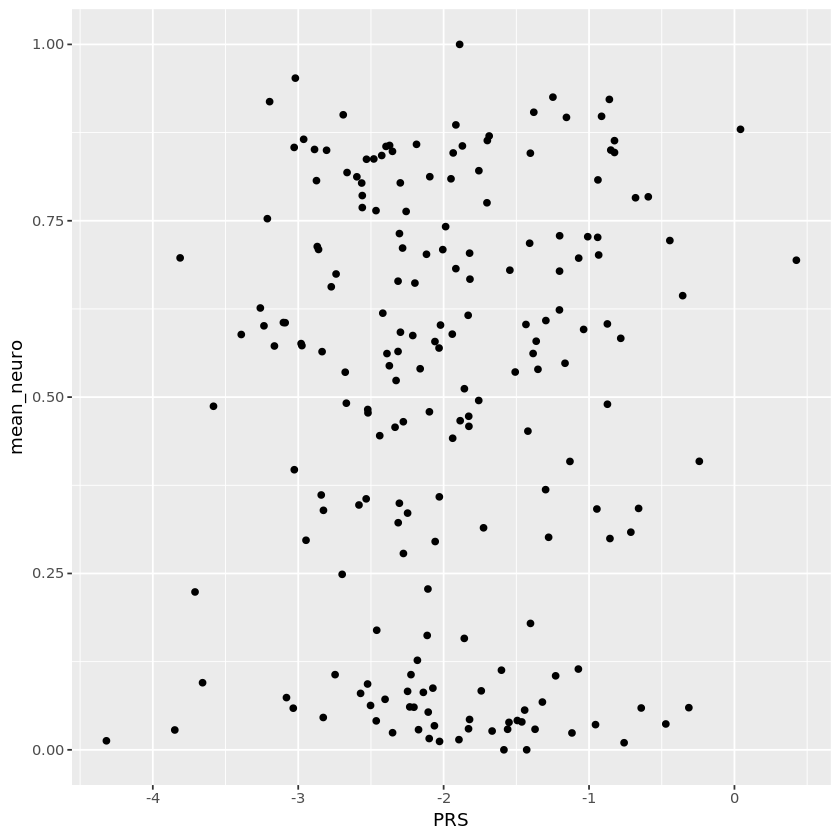

In [86]:
cor(df3$PRS, df3$mean_neuro)
ggplot(df3, aes(x = PRS, y = mean_neuro)) + geom_point()

In [87]:
###### SCZ

In [105]:
myfilenames = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/PRS/colnames.txt"
df_n = read.csv(myfilenames, sep='\t')
df_n[1,]

,X.,X55108,X55111,X55117,X55118,X55120,X55122,X55133,X55136,X55138,...,HPSI0416i.eapo_2,HPSI0616i.duve_6,HPSI0616pf.bury,HPSI0516i.peoo_1,HPSI0416pf.eapo,HPSI0616i.mifg_5,HPSI0516pf.eosr,HPSI0616pf.xuvy,HPSI0416pf.cihd,HPSI0616i.mifg_2
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [101]:
myfile = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/PRS/schizophrenia_2014_PRS.txt"
df1 = read.csv(myfile,sep='\t', header = F, row.names = 1)
df1

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V2525,V2526,V2527,V2528,V2529,V2530,V2531,V2532,V2533,V2534
Schizophrenia_2014_25056061_hg19.txt.gz_P0.001,-5.407287,-0.9715429,-0.73089388,-4.03636004,-2.9403848,-3.4104760,0.67641723,-0.13240566,-0.9695291,-4.37772036,...,0.02361231,-3.64642540,-0.58932629,-1.5168458,0.05840732,-2.332344384,-2.99758358,-3.6365734,-1.322473,-2.257555554
Schizophrenia_2014_25056061_hg19.txt.gz_P1.0E-5,-1.278630,-0.2250306,0.08497827,-0.14035983,-1.0122765,-0.3497338,0.23865509,-0.58707932,-0.8124494,-0.26571817,...,0.84819500,-0.04058344,0.46731969,-0.1828269,0.78119077,-0.002679584,-0.05150076,-0.7497274,1.042080,-0.002679584
Schizophrenia_2014_25056061_hg19.txt.gz_P1.0E-4,-1.469041,-0.3158487,-0.04012585,-0.38515639,-0.9842711,-0.7000624,0.19732344,-0.56725820,-0.4461379,-0.40947043,...,1.97700571,-0.46525898,-0.06795039,-0.4077620,1.95339842,-0.557285275,0.17304011,-1.1579107,1.165845,-0.581788185
Schizophrenia_2014_25056061_hg19.txt.gz_P5.0E-8,-0.630403,0.0466995,0.10839551,-0.08360955,0.1153086,-0.3523169,-0.07560515,-0.58628215,-0.6000994,0.02648938,...,0.09060177,-0.02668286,-0.32128967,-0.4099977,0.09060177,-0.248176579,-0.01337725,-0.2633963,0.088688,-0.248176579
Schizophrenia_2014_25056061_hg19.txt.gz_P0.01,-5.262437,1.1067646,-1.51821527,-3.90085433,-0.7179872,-1.7496532,6.49572385,-0.04951528,5.9857238,-6.03367998,...,3.93320712,-3.24267973,5.56460812,-3.5704385,4.30109560,-1.530433073,1.17924189,-5.3843346,-1.335585,-1.135050640


In [106]:
colnames(df1) = colnames(df_n)[2:ncol(df_n)]
head(df1,2)

,X55108,X55111,X55117,X55118,X55120,X55122,X55133,X55136,X55138,X55142,...,HPSI0416i.eapo_2,HPSI0616i.duve_6,HPSI0616pf.bury,HPSI0516i.peoo_1,HPSI0416pf.eapo,HPSI0616i.mifg_5,HPSI0516pf.eosr,HPSI0616pf.xuvy,HPSI0416pf.cihd,HPSI0616i.mifg_2
Schizophrenia_2014_25056061_hg19.txt.gz_P0.001,-5.407287,-0.9715429,-0.73089388,-4.0363600,-2.940385,-3.4104760,0.6764172,-0.1324057,-0.9695291,-4.3777204,...,0.02361231,-3.64642540,-0.5893263,-1.5168458,0.05840732,-2.332344384,-2.99758358,-3.6365734,-1.322473,-2.257555554
Schizophrenia_2014_25056061_hg19.txt.gz_P1.0E-5,-1.278630,-0.2250306,0.08497827,-0.1403598,-1.012277,-0.3497338,0.2386551,-0.5870793,-0.8124494,-0.2657182,...,0.84819500,-0.04058344,0.4673197,-0.1828269,0.78119077,-0.002679584,-0.05150076,-0.7497274,1.042080,-0.002679584


In [107]:
colnames(df1) = gsub("\\.","-",colnames(df1))
head(df1,2)

,X55108,X55111,X55117,X55118,X55120,X55122,X55133,X55136,X55138,X55142,...,HPSI0416i-eapo_2,HPSI0616i-duve_6,HPSI0616pf-bury,HPSI0516i-peoo_1,HPSI0416pf-eapo,HPSI0616i-mifg_5,HPSI0516pf-eosr,HPSI0616pf-xuvy,HPSI0416pf-cihd,HPSI0616i-mifg_2
Schizophrenia_2014_25056061_hg19.txt.gz_P0.001,-5.407287,-0.9715429,-0.73089388,-4.0363600,-2.940385,-3.4104760,0.6764172,-0.1324057,-0.9695291,-4.3777204,...,0.02361231,-3.64642540,-0.5893263,-1.5168458,0.05840732,-2.332344384,-2.99758358,-3.6365734,-1.322473,-2.257555554
Schizophrenia_2014_25056061_hg19.txt.gz_P1.0E-5,-1.278630,-0.2250306,0.08497827,-0.1403598,-1.012277,-0.3497338,0.2386551,-0.5870793,-0.8124494,-0.2657182,...,0.84819500,-0.04058344,0.4673197,-0.1828269,0.78119077,-0.002679584,-0.05150076,-0.7497274,1.042080,-0.002679584


In [108]:
df1 = df1[,colnames(df1) %in% donors]
head(df1)

,HPSI0514i-sohd_2,HPSI0115i-zihe_1,HPSI1014i-eesb_1,HPSI0913i-eika_2,HPSI0114i-lexy_2,HPSI1014i-quls_2,HPSI0514i-yewo_4,HPSI0314i-bubh_3,HPSI0714i-burb_1,HPSI0314i-xugn_2,...,HPSI0413i-nudd_1,HPSI0513i-pedc_1,HPSI0513i-dulv_1,HPSI0813i-peoj_1,HPSI0413i-yotv_2,HPSI0513i-dipe_1,HPSI0613i-bawa_1,HPSI0813i-aizi_3,HPSI0613i-hikj_2,HPSI0513i-momt_2
Schizophrenia_2014_25056061_hg19.txt.gz_P0.001,-3.3679163,-2.5821736,-4.3871905,-1.33008659,-1.13178608,-2.35780320,-1.63949431,-0.6556143,-2.34811007,-0.03387275,...,-3.8618114,-4.5960788,-2.7525353,-4.4407338,-3.75967637,-1.6994333,-1.9471614,-2.1354865,-3.1559749,-1.9082580
Schizophrenia_2014_25056061_hg19.txt.gz_P1.0E-5,-1.0868936,-0.1488968,-0.9276031,-0.31474220,0.13856724,-0.03803811,-0.42702296,0.5899089,-0.67890273,-0.09500873,...,-1.6165052,-0.9275982,-0.8576386,-0.9023338,-0.53162469,-0.3627295,-0.0254836,0.6111788,-0.2584697,0.3283094
Schizophrenia_2014_25056061_hg19.txt.gz_P1.0E-4,-1.4517166,-1.3272978,-1.0613974,0.33497585,0.52516911,-1.08073005,-0.17259958,1.2206254,-0.74201574,0.34738213,...,-1.9883197,-1.5096095,-0.8299739,-1.3329467,-1.80888685,0.3314670,0.1020804,-0.1129365,-0.7289304,-0.5138126
Schizophrenia_2014_25056061_hg19.txt.gz_P5.0E-8,-0.6210077,0.1119057,-0.2523006,0.01619393,-0.06109085,0.33960676,-0.09319174,0.2759088,0.01488976,-0.08870253,...,-0.3755866,-0.2954907,-0.2002111,-0.3574986,0.05808307,-0.1451929,0.3958157,0.2534907,-0.1364868,0.3271048
Schizophrenia_2014_25056061_hg19.txt.gz_P0.01,-4.3318184,-3.3414902,-5.7319742,-0.43689609,-0.77535954,-0.73864448,-0.87072529,-3.8139192,-2.27099637,-0.66299569,...,-6.4005551,-1.6075278,-2.1483120,-1.9325746,-2.17866507,-2.0791035,-4.0992028,-3.6650879,-5.1491770,1.2047604


In [109]:
df2 = data.frame(donor_id = colnames(df1), PRS_0.001 = t(df1[4,]))
colnames(df2)[2] = 'PRS'
head(df2)

,donor_id,PRS
HPSI0514i-sohd_2,HPSI0514i-sohd_2,-0.62100770
HPSI0115i-zihe_1,HPSI0115i-zihe_1,0.11190567
HPSI1014i-eesb_1,HPSI1014i-eesb_1,-0.25230063
HPSI0913i-eika_2,HPSI0913i-eika_2,0.01619393
HPSI0114i-lexy_2,HPSI0114i-lexy_2,-0.06109085
HPSI1014i-quls_2,HPSI1014i-quls_2,0.33960676


In [110]:
df3 = inner_join(df,df2)
head(df3)

Joining, by = "donor_id"


donor_id,mean_neuro,PRS
HPSI0114i-bezi_3,0.57876802,0.01540441
HPSI0114i-eipl_1,0.01278164,0.15480663
HPSI0114i-fikt_3,0.40896921,-0.10679264
HPSI0114i-kolf_2,0.47284436,-0.21450224
HPSI0114i-lexy_2,0.72873194,-0.06109085
HPSI0114i-posc_1,0.80947368,0.04480143


In [111]:
cor.test(df3$PRS, df3$mean_neuro)


	Pearson's product-moment correlation

data:  df3$PRS and df3$mean_neuro
t = 0.22187, df = 197, p-value = 0.8246
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1235559  0.1545558
sample estimates:
       cor 
0.01580567 


[1] 0.01580567

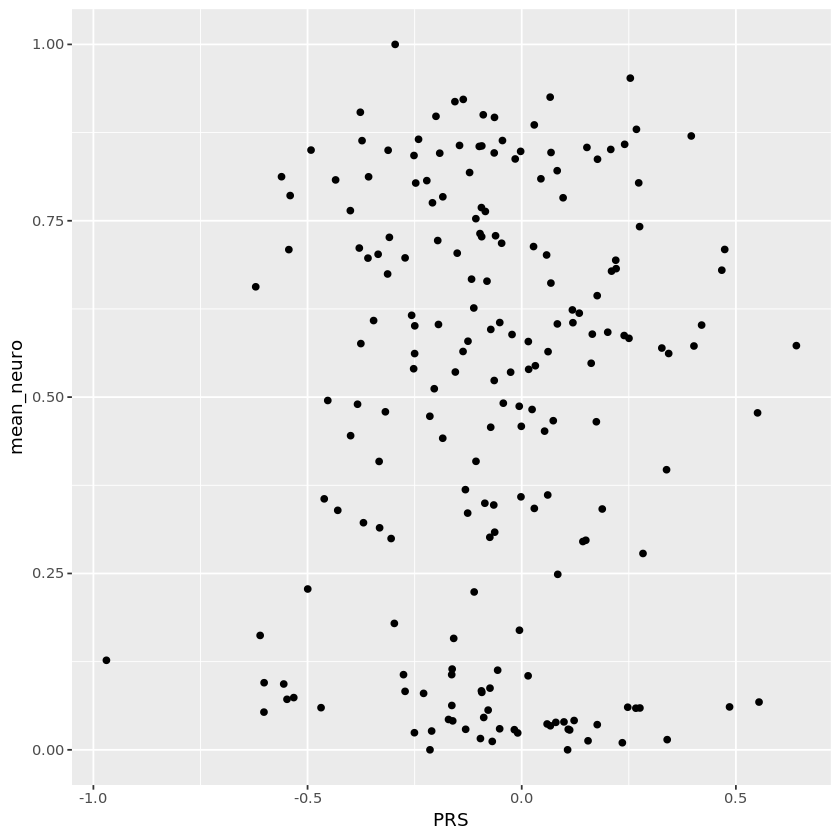

In [112]:
cor(df3$PRS, df3$mean_neuro)
ggplot(df3, aes(x = PRS, y = mean_neuro)) + geom_point()